In [14]:
%matplotlib inline

# Classifying on shots features using Random Forest

In [15]:
import numpy as np
import pandas as pd

df_shots_faces = pd.read_csv('../features/shots/faces_df.csv')

In [16]:
df_shots_faces.head()

,Unnamed: 0,filename,shot,nb_faces
0,0,Aabbey1-InvitationToSummer2009RabbinicalStudyS...,012.jpg,0
1,1,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,4797.jpg,1
2,2,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,9763.jpg,0
3,3,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,0083.jpg,0
4,4,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,3061.jpg,1


In [17]:
df_faces = df_shots_faces.groupby(['filename'])['nb_faces'].max().to_frame()
df_faces.reset_index(level=0, inplace=True)
df_faces.columns = ['filename', 'nb_faces_max']
df_faces.head()

,filename,nb_faces_max
0,Aabbey1-InvitationToSummer2009RabbinicalStudyS...,0
1,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,1
2,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,1
3,Acnethai-414,1
4,Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,0


In [18]:
df_shots_text = pd.read_csv('../features/shots/shot_text_df.csv')
df_shots_text.head()

,filename,shot,has_text,text
0,Aabbey1-InvitationToSummer2009RabbinicalStudyS...,012.jpg,True,SHALOM HARTMAN INSTITUTE RABBINIC TORAH STUDY ...
1,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,4797.jpg,False,NaN
2,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,9763.jpg,True,Shaom Hartman Institute
3,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,0083.jpg,True,Prof Menachem Fisch Shalom Hartman Institute T...
4,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,3061.jpg,False,NaN


In [19]:
df_text = df_shots_text.groupby(['filename']).apply(lambda x: x['has_text'].sum() > 0).to_frame()
df_text.reset_index(level=0, inplace=True)
df_text.columns = ['filename', 'has_text']
df_text.head()

,filename,has_text
0,Aabbey1-InvitationToSummer2009RabbinicalStudyS...,True
1,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,True
2,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,True
3,Acnethai-414,False
4,Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,True


In [20]:
df_nb_shots = pd.read_csv('../features/shots/nb_shots_df.csv')
df_nb_shots.columns = ['filename', 'nb_shots']
df_nb_shots.head()

,filename,nb_shots
0,Bavc-GossipChismeDeborah157,392
1,WybaK-MIRACLEKAABAAVOIR920,139
2,Drinkart-MakersMarkEggNogArtOfTheDrink51899,127
3,Drinkart-SingaporeSlingArtOfTheDrink50269,113
4,Mediagrouptv-CircuitoOff2008Day01OpeningParty179,80


## Merge dataframes

In [21]:
assert len(df_text) == len(df_faces) == len(df_nb_shots)
df = df_text.merge(df_faces,on='filename').merge(df_nb_shots,on='filename')
df.set_index('filename', inplace=True)
df.head()

,has_text,nb_faces_max,nb_shots
filename,,,
Aabbey1-InvitationToSummer2009RabbinicalStudySeminarAtHartmanIn262,True,0,1
Aabbey1-RachelSabathBeitHalachmiThreeModelsOfTorahOnCelebrating136,True,1,2
Aabbey1-ShalomHartmanInstitutesInnovativeTheologyConference661,True,1,5
Acnethai-414,False,1,2
Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,True,0,7


## Classifying

In [29]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier()

df['tag'] = pd.read_csv('../features/tags.csv', index_col=0)['tag_name']

y = df['tag']

X = df.drop('tag', axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Precision score


In [30]:
from sklearn import metrics

metrics.precision_score(y_test, y_pred, average='micro')

0.29565217391304349

## Confusion matrix

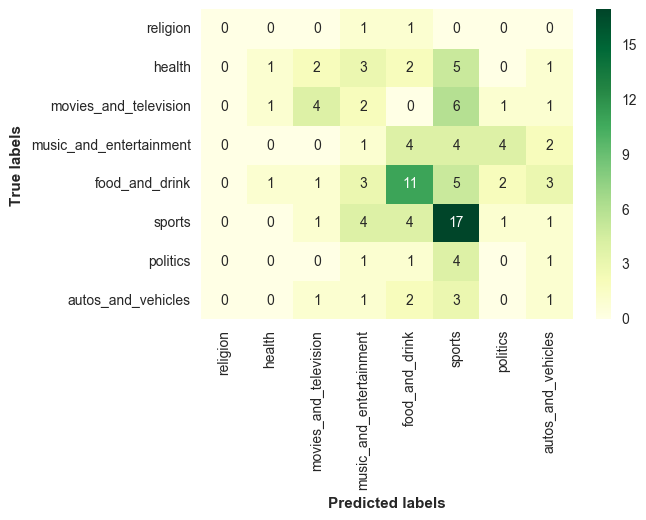

In [27]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
#cm = cm / cm.sum(axis=1).reshape(-1, 1) # Obtain the normalized color map 
ax = sns.heatmap(cm, annot=True, xticklabels=y.unique(), yticklabels=y.unique(), cmap='YlGn')
ax.set_xlabel('Predicted labels', fontweight='bold')
ax.set_ylabel('True labels', fontweight='bold')